# Fine-tuning your model
In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.







# Overview 
confusion matrix
What is confusion matrix

$  TPR= \frac{TP}{P}= \frac{TP}{TP+FN}=1-FNR$

*sensitivity*, *recall*, *hit rate*, or *true positive rate* (TPR)

$  TNR= \frac{TN}{N}= \frac{TN}{TN+FP}=1-FPR$

*specificity*, *selectivity* or *true negative rate* (TNR)

$  PPV= \frac{TP}{TP+FP}=1-FDR$

precision or positive predictive value (PPV)

$  ACC= \frac{TP+TN}{P+N}=\frac{TP+TN}{TP+TN+FP+FN}$
*accuracy* (ACC)

$  F1= 2.\frac{PPV.TPR}{PPV+TPR}=\frac{2TP}{2TP+FP+FN}$

**F1 scoreis** is  **the harmonic mean** of **precision** and **sensitivity**



# Set up 

In [ ]:
# modified/added by Jinny
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/diabetes.csv')
print(df.head())

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
# print(df.head())

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))
y = df['diabetes']
X = df.drop('diabetes', axis=1)

   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]


#Metrics for classification

In [ ]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 52  50]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.62      0.49      0.55       102

    accuracy                           0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



#Building a logistic regression model

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(solver="liblinear")

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 35  67]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

    accuracy                           0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

#
y = df['diabetes']
X = df.drop('diabetes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

#
logreg = LogisticRegression(solver="liblinear")#add solver by Jinny
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#plot Roc curve

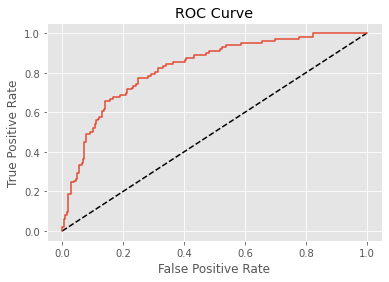

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

    accuracy                           0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308

[[176  30]
 [ 35  67]]


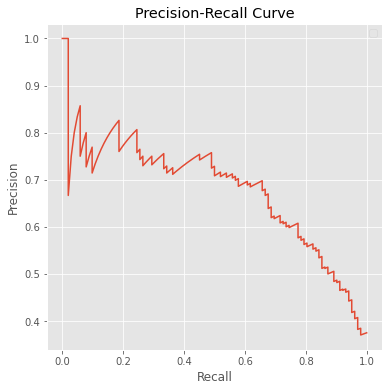

In [ ]:
# Modified/Added by Jinny
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

#
y = df['diabetes']
X = df.drop('diabetes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

#
clf = LogisticRegression(solver="liblinear")#add solver by Jinny
clf.fit(X_train, y_train)

#
from sklearn.metrics import precision_recall_curve

#
y_pred_prob = clf.predict_proba(X_test)[:,1]

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

#
plt.figure(figsize=(6, 6), dpi=None)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

#AUC computation 

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8254806777079765
AUC scores computed using 5-fold cross-validation: [0.80166667 0.8062963  0.81481481 0.86264151 0.8554717 ]


#Hyperparameter tuning with GridSearchCV

In [ ]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver="liblinear") #add solver by Jinny

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.7708768355827178


#Hyperparameter tuning with RandomizedSearchCV

In [ ]:

# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 8}
Best score is 0.7357185298361768


#Hold-out set in practice I: Classification

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7673913043478262


#Hold-out set in practice II: Regression

In [ ]:
# modified/added by Jinny
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2433/datasets/gapminder-clean.csv')
y = df['life'].values
X = df.drop('life', axis=1).values


In [ ]:
# Import necessary modules
from sklearn.linear_model import ElasticNet 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.4862175850645, tolerance: 0.558941590909091
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.8466391486292, tolerance: 0.5893071666666668
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.5034400806133, tolerance: 0.5890250303030303
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.672841

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398445
